<a href="https://colab.research.google.com/github/yesyell/DA_School_1/blob/main/Python%20%EC%8B%AC%ED%99%94/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%EC%8A%A4%EC%BF%A8_0512.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [심화] 같이 푸는 Python

https://likelion.notion.site/0914eb22cc7444e8b1b2473683b23eb1

## 1) 실시간 검색어 확인하기

- crawler: 1. 기는 것 2. 파충류
- 크롤러 : 우리를 대신해서 웹 페이지를 기어다니며 데이터를 모아주는 소프트웨어
- 웹 크롤링 : 크롤러를 사용해 웹 페이지의의 데이터를 추출해 내는 행위



In [ ]:
from bs4 import BeautifulSoup
import requests
from datetime import datetime

url = "http://www.naver.com/"
response = requests.get(url)

soup = BeautifulSoup(response.text, 'html.parser')
results = soup.findAll('a','link_favorsch')

search_rank_file = open("rankresult.txt","a")

print(datetime.today().strftime("%Y년 %m월 %d일의 실시간 검색어 순위입니다.\n"))

rank = 1
for result in results:
    search_rank_file.write(str(rank)+"위:"+result.get_text()+"\n")
    print(rank,"위 : ",result.get_text(),"\n")
    rank += 1

- requests : 요청하고 응답받기

In [ ]:
import requests

print(requests)
print(requests.get) 

1. PUT
2. GET 요청을 보내는 기능 
3. POST
4. DELETE

> 요청(client) <-> 응답(server)



https://requests.readthedocs.io/en/latest/api/

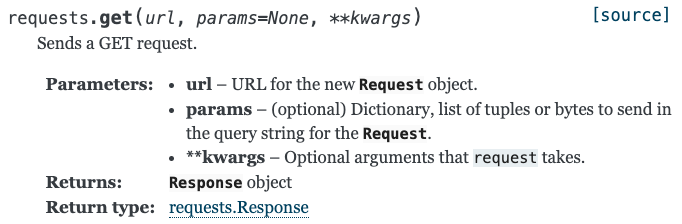

In [ ]:
import requests

url = "https://www.nate.com/"
response = requests.get(url)

print(response)
print(response.text)
# print(response.url)
# print(response.content)
# print(response.encoding)
# print(response.headers)
# print(response.json)
# print(response.links)
# print(response.ok)
# print(response.status_code)

- BeautifulSoup

In [ ]:
from bs4 import BeautifulSoup

# BeautifulSoup(데이터, 파싱방법)
soup = BeautifulSoup(response.text, 'html.parser')

print(soup.title)
print(soup.title.string)
print(soup.span)
print(soup.findAll('span'))

# print(response.text[:500])

In [ ]:
print(type(response.text))
print(type(BeautifulSoup(response.text, 'html.parser')))

In [ ]:
file = open('nate.html', 'w')
file.write(response.text)
file.close()

In [ ]:
from datetime import datetime

print(datetime.today().strftime("%Y년 %m월 %d일의 실시간 검색어 순위입니다.\n"))

In [ ]:
# html 문서에서 모든 span태그를 가져오는 코드
results = soup.findAll('span','txt_rank')

# read / write / append
search_rank_file = open('rankresult.txt','w')

rank = 1
for result in results:
    print(f'{rank}위: {result.get_text()}')
    search_rank_file.write(str(rank)+'위: '+result.get_text()+' \n')
    rank += 1

In [ ]:
from bs4 import BeautifulSoup
import requests
from datetime import datetime

headers = {'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/63.0.3239.132 Safari/537.36'}
url = "https://datalab.naver.com/keyword/realtimeList.naver?age=20s"
response = requests.get(url,headers=headers)
soup = BeautifulSoup(response.text, 'html.parser') # from_encoding='euc-kr'
rank = 1
# span - item_title
results = soup.findAll('span','item_title')

# print(response.text)

search_rank_file = open("rankresult.txt","a")

print(datetime.today().strftime("%Y년 %m월 %d일의 실시간 검색어 순위입니다.\n"))

for result in results:
    search_rank_file.write(str(rank)+"위:"+result.get_text()+"\n")
    print(rank,"위 : ",result.get_text(),"\n")
    rank += 1

## 2) 날씨 정보 받아오기 
- Openweathermap
https://openweathermap.org/current#name

In [ ]:
import requests
import json

city = "Seoul"
apikey = "289ada0701c7e2e750576af30d9deeae"
lang = "kr"

api = f"""http://api.openweathermap.org/data/2.5/weather?\
q={city}&appid={apikey}&lang={lang}&units=metric"""

result = requests.get(api)
data = json.loads(result.text)

print(data["name"],"의 날씨입니다.")
print("날씨는 ",data["weather"][0]["description"],"입니다.")
print("현재 온도는 ",data["main"]["temp"],"입니다.")
print("하지만 체감 온도는 ",data["main"]["feels_like"],"입니다.")
print("최저 기온은 ",data["main"]["temp_min"],"입니다.")
print("최고 기온은 ",data["main"]["temp_max"],"입니다.")
print("습도는 ",data["main"]["humidity"],"입니다.")
print("기압은 ",data["main"]["pressure"],"입니다.")
print("풍향은 ",data["wind"]["deg"],"입니다.")
print("풍속은 ",data["wind"]["speed"],"입니다.")

Client - **A**pplication **P**rogramming **I**nterface - Server

JSON(JavaScript Object Notation) : 데이터를 주고 받을 때 사용하는 포맷

In [ ]:
import requests
import json

city = "Seoul"
apikey = "289ada0701c7e2e750576af30d9deeae"
lang = "sf"      # 언어 https://en.wikipedia.org/wiki/ISO_3166-2
units = "metric" # 온도 단위

api = f"""https://api.openweathermap.org/data/2.5/\
weather?q={city}&appid={apikey}&lang={lang}&units={units}"""

result = requests.get(api)
data = json.loads(result.text)

# print(type(result.text))  # str
# print(type(data))         # dict

print(data["name"]) # 지역
print(data["weather"][0]["description"]) # 날씨
print(data["main"]["temp"]) # 현재 온도
print(data["main"]["feels_like"]) # 체감 온도
print(data["main"]["temp_min"]) # 최저 기온 : main - temp_min
print(data["main"]["temp_max"]) # 최고 기온 : main - temp_max
print(data["main"]["humidity"]) # 습도 : main - humidity
print(data["main"]["pressure"]) # 기압 : main - pressure
print(data["wind"]["deg"]) # 풍향 : wind - deg
print(data["wind"]["speed"]) # 풍속 : wind - speed


## 3) 번역하기
- Googletrans
https://py-googletrans.readthedocs.io/en/latest/

In [ ]:
from googletrans import Translator

# 1. 번역기를 만든다 
translator = Translator()

# 2. 변역를 원하는 문장을 설정한다 
# sentence = "좋은 아침이에요"
sentence = str(input("번역을 원하는 문장을 입력하세요 : "))
dest = str(input("어떤 언어로 번역을 원하시나요? "))

# 2-1. 언어를 감지한다
detected = translator.detect(sentence)

# 3. 번역을 원하는 언어를 설정한다  
# translate(text, dest, src)
result = translator.translate(sentence, dest)

# 4. 번역한다 
print("\n============= 번역 결과 ============\n")
print(detected.lang,":", result.origin)
print(result.dest,":", result.text)
print("\n====================================\n")

In [ ]:
print(Translator)
print(detected)
print(result)

## 4) 메일 보내기

In [ ]:
from email.message import EmailMessage
import smtplib

# SMTP 접속을 위한 서버, 계정 설정
SMTP_SERVER = "smtp.gmail.com"
# google의 SMTP server 포트 주소는 465
SMTP_PORT = 465


# 이메일 유효성 검사 함수
def is_valid(addr):
    import re
    if re.match('(^[a-zA-Z0-9.+_-]+@[a-zA-Z0-9-]+.[a-zA-Z]{2,3}$)', addr):
        return True
    else:
        return False

message = EmailMessage()
message.set_content("코드라이언 메일링 수업 - 본문입니다.")

message["Subject"] = "코드라이언 메일링 수업입니다."
message["From"] = "###@gmail.com"
message["To"] = "###@gmail.com"

smtp = smtplib.SMTP_SSL(SMTP_SERVER,SMTP_PORT)
smtp.login("###@gmail.com","######")

is_valid("###@gmail.com")
if smtp.send_message(message)=={} :
    print("성공적으로 메일을 보냈습니다.")

smtp.quit()

SMTP(**S**imple **M**ail **T**ransfer **P**rotocol)

- SMTP 서버를 이용해서 우리가 원하는 곳으로 메일을 보낼 수 있다

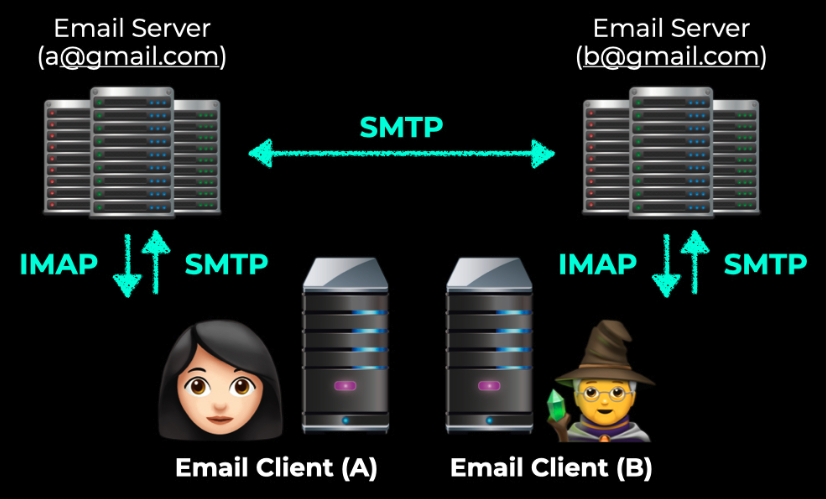

smtplib 모듈

In [ ]:
import smtplib

SMTP_SERVER = "smtp.gmail.com"
SMTP_PORT = 465

# 1. SMTP 메일 서버를 연결한다 
smtp = smtplib.SMTP_SSL(SMTP_SERVER, SMTP_PORT)

# 2. SMTP 메일 서버에 로그인한다 
smtp.login("yelin5262@likelion.org", "#")

In [ ]:
print(smtp)

email.message 모듈의 .EmailMessage 기능
- MIME 타입으로 변환

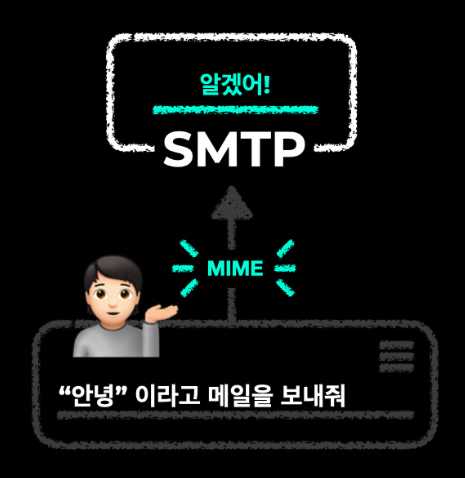

In [ ]:
from email.message import EmailMessage

# 3. 이메일을 만든다 
message = EmailMessage()

# 3-1. 이메일에 내용을 담는다
# MIME Content
message.set_content("코드라이언 수업중입니다. 이미지를 첨부합니다.")

# 3-2. 제목, 발신자, 수신자를 설정한다
# MIME Header
message["Subject"] = "이것은 제목입니다."
message["From"] = "yelin5262@likelion.org"
message["To"] = "yelin5262@gmail.com"

In [ ]:
# 4. SMTP 메일 서버로 메일을 보낸다
smtp.send_message(message)
smtp.quit()

### 메일에 사진 첨부하기

rb / wb / ab

In [ ]:
# image = open("codelion.png", "rb")
# image.read()
# image.close()

with open("codelion.png", "rb") as image:
    image_file = image.read()

add_attachment( ) - multipart/mixed 타입의 메일
1. image - 내용
2. maintype - 유형 (image)
3. subtype - 확장자 (png)

In [ ]:
import imghdr # 이미지 유형(확장자) 판단

image_type = imghdr.what('codelion', image_file) # png
message.add_attachment(image_file, maintype = "image", subtype = image_type)

### 유효성 검사하기
- 정규표현식

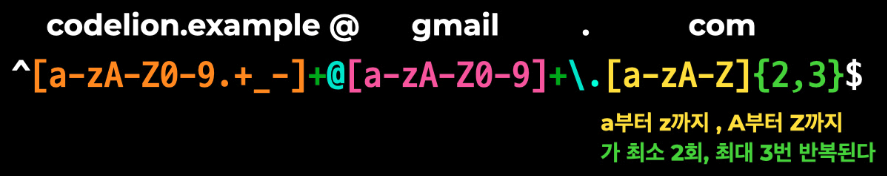

In [ ]:
import re

def sendEmail(addr):
    reg = "^[a-zA-Z0-9.+_-]+@[a-zA-Z0-9]+\.[a-zA-Z]{2,3}$"
    valid = re.match(reg, addr)   # 부적합 시 None, addr은 발신 메일주소
    if bool(valid):
        smtp.send_message(message)
        print("정상적으로 메일이 발송되었습니다.")
    else:
        print("유효한 이메일 주소가 아닙니다.")

sendEmail("yelin5262@gmail.com")
smtp.quit()